In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"qasmovdyant","key":"4d4759066dca189587bcac8981b34740"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d START-UMD/gtd

Dataset URL: https://www.kaggle.com/datasets/START-UMD/gtd
License(s): other
 98% 28.0M/28.7M [00:02<00:00, 20.6MB/s]
100% 28.7M/28.7M [00:02<00:00, 13.6MB/s]


In [ ]:
!unzip /content/gtd.zip

Archive:  /content/gtd.zip
  inflating: globalterrorismdb_0718dist.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding='latin-1')

<ipython-input-7-b0943089da1f>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding='latin-1')


In [ ]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
df.shape

(181691, 135)

In [ ]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.values

array([[197000000001, 1970, 7, ..., 0, 0, nan],
       [197000000002, 1970, 0, ..., 1, 1, nan],
       [197001000001, 1970, 1, ..., 1, 1, nan],
       ...,
       [201712310030, 2017, 12, ..., 0, 0, nan],
       [201712310031, 2017, 12, ..., 0, -9, nan],
       [201712310032, 2017, 12, ..., 0, -9, nan]], dtype=object)

In [ ]:
df1=df.copy()
df1

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
df1.country([160])

217

In [ ]:
df1.country.value_counts()

,count
country,
95,24636
153,14368
4,12731
92,11960
45,8306
...,...
422,1
226,1
428,1


In [ ]:
df1.sort_values(by='country_txt')

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
148015,201505130007,2015,5,13,NaN,0,NaN,4,Afghanistan,6,...,Casualty numbers for this incident conflict ac...,"""Taliban claim attack on Afghan guesthouse tha...","""British man among 14 killed in Taliban attack...","""4 Indians Killed in Af Taliban attack,"" New I...",START Primary Collection,0,1,1,1,NaN
165110,201607230066,2016,7,23,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""State PAO: Afghan Morning News Clips 24 July ...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
165109,201607230065,2016,7,23,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""State PAO: Afghan Morning News Clips 24 July ...",NaN,NaN,START Primary Collection,-9,-9,0,-9,"201607230064, 201607230065"
154957,201511010023,2015,11,1,2015-11-01 00:00:00,1,NaN,4,Afghanistan,6,...,NaN,"""Taliban kidnap four civilians,"" Frontier Post...","""Clashes erupt between police, Taliban in Saro...",NaN,START Primary Collection,0,0,0,0,NaN
165108,201607230064,2016,7,23,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""State PAO: Afghan Morning News Clips 24 July ...",NaN,NaN,START Primary Collection,-9,-9,0,-9,"201607230064, 201607230065"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74082,200205050006,2002,5,5,NaN,0,NaN,231,Zimbabwe,11,...,Jenus Ngamira had been a polling station worke...,Zimbabwe: Two more MDC supporters reportedly ...,NaN,NaN,CETIS,0,0,0,0,NaN
74183,200205230005,2002,5,23,NaN,0,NaN,231,Zimbabwe,11,...,NaN,Seven Die as Zimbabwe Sect Members Drink Pois...,Zimbabwe: Five Poison Victims Still in Hospit...,Zimbabwe: Handle Chemical Containers Correctl...,CETIS,-9,-9,0,-9,NaN
16659,198207240008,1982,7,24,NaN,0,NaN,231,Zimbabwe,11,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
11508,198007230011,1980,7,23,NaN,0,NaN,231,Zimbabwe,11,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df1['iyear'].value_counts()

,count
iyear,
2014,16903
2015,14965
2016,13587
2013,12036
2017,10900
2012,8522
2011,5076
1992,5071
2010,4826


In [ ]:
# df1 = df1[(df1['iyear'] > 0)  (df1['imonth'] > 0) (df1['iday'] > 0)]
df1['iday'].replace(0, df1['iday'].median(), inplace=True)

<ipython-input-33-bcd1b23d3380>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['iday'].replace(0, df1['iday'].median(), inplace=True)


In [ ]:
df1 = df1[(df1['iyear'] > 0) & (df1['imonth'] > 0) & (df1['iday'] > 0)]

In [ ]:
# Sütunları uyğun qaydada təqdim edirik: [year, month, day]
df1['date'] = pd.to_datetime(df1[['iyear', 'imonth', 'iday']].astype(str).agg('-'.join, axis=1), errors='coerce')

# Tarixlərdən nəticəni yoxlamaq
print(df1[['iyear', 'imonth', 'iday', 'date']].head())

   iyear  imonth  iday       date
0   1970       7     2 1970-07-02
2   1970       1    15 1970-01-15
3   1970       1    15 1970-01-15
4   1970       1    15 1970-01-15
5   1970       1     1 1970-01-01


<ipython-input-35-395551c391fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = pd.to_datetime(df1[['iyear', 'imonth', 'iday']].astype(str).agg('-'.join, axis=1), errors='coerce')


In [ ]:
df1.drop('iday', axis=1, inplace=True)

<ipython-input-36-1bce12831ded>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('iday', axis=1, inplace=True)


In [ ]:
df1.drop('iyear', axis=1, inplace=True)

<ipython-input-37-d8b4069fa90e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('iyear', axis=1, inplace=True)


In [ ]:
df1.drop('imonth', axis=1, inplace=True)

<ipython-input-38-9cbcc920e8a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('imonth', axis=1, inplace=True)


In [ ]:
df1

,eventid,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date
0,197000000001,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1970-07-02
2,197001000001,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1970-01-15
3,197001000002,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1970-01-15
4,197001000003,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1970-01-15
5,197001010002,NaN,0,NaN,217,United States,1,North America,Illinois,Cairo,...,"""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,...,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN,2017-12-31
181687,201712310029,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,...,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN,2017-12-31
181688,201712310030,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,...,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN,2017-12-31
181689,201712310031,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,...,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,2017-12-31


<ipython-input-48-baa26c4ecaaa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year'] = pd.to_datetime(df1['date']).dt.year


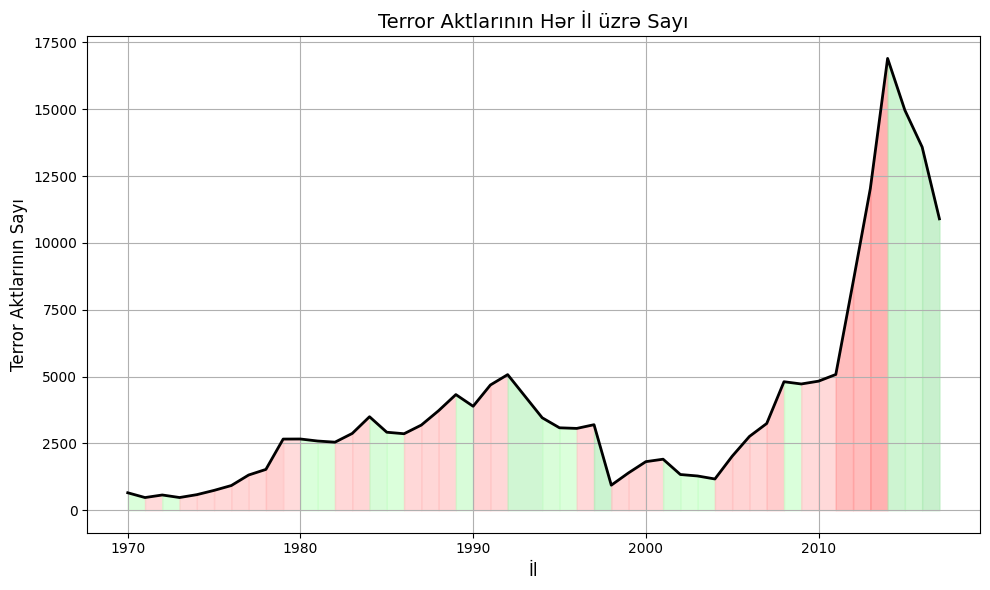

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Tarix sütunundan ili çıxarmaq
df1['year'] = pd.to_datetime(df1['date']).dt.year

# İllər üzrə terror aktlarını saymaq
annual_counts = df1['year'].value_counts().sort_index()

# Qrafikin yaradılması
fig, ax = plt.subplots(figsize=(10, 6))

# Xəttin y-oxu dəyərləri (terror aktlarının sayı)
y_patch = annual_counts.values  # Bu yerdə y_patch terror aktlarının sayını saxlayır

# Qırmızı və yaşıl rənglər üçün gradientlər yaratmaq
red_cmap = LinearSegmentedColormap.from_list("red_gradient", ['#ffcccc', '#ff0000'])
green_cmap = LinearSegmentedColormap.from_list("green_gradient", ['#ccffcc', '#268358'])

# Artım və azalma hissələrini rənglərə uyğunlaşdırmaq üçün
for i in range(1, len(annual_counts)):
    if y_patch[i] > y_patch[i-1]:  # Artım varsa
        # Artım miqdarına uyğun olaraq qırmızı rəng seçilir
        increment = y_patch[i] - y_patch[i-1]
        max_increment = max(y_patch) - min(y_patch)  # Artımın maksimal diapazonu
        color_intensity = increment / max_increment
        red_shade = red_cmap(color_intensity)  # Gradientdən rəng seçilir

        ax.fill_between(annual_counts.index[i-1:i+1], y_patch[i-1:i+1], color=red_shade, alpha=0.7)
    else:  # Azalma varsa
        # Azalma miqdarına uyğun olaraq yaşıl rəng seçilir
        decrement = y_patch[i-1] - y_patch[i]
        max_decrement = max(y_patch) - min(y_patch)  # Azalmanın maksimal diapazonu
        color_intensity = decrement / max_decrement
        green_shade = green_cmap(color_intensity)  # Gradientdən rəng seçilir

        ax.fill_between(annual_counts.index[i-1:i+1], y_patch[i-1:i+1], color=green_shade, alpha=0.7)

# Xətti çəkmək
ax.plot(annual_counts.index, y_patch, color='black', linewidth=2)

# Başlıq və etiketlər
ax.set_title('Terror Aktlarının Hər İl üzrə Sayı', fontsize=14)
ax.set_xlabel('İl', fontsize=12)
ax.set_ylabel('Terror Aktlarının Sayı', fontsize=12)

# Qrafikin göstərilməsi
ax.grid(True)
plt.tight_layout()
plt.show()